<h1> Trabajo practico para Fundamentos de Ciencia de Datos </h1>
<h2> Mateo Rovere </h1>
<h2> Parte 1 </h2>

<h3>Introduccion: </h3>
El objetivo de este trabajo es explorar los datos de los turistas que ingresan al pais en diferentes aeropuertos combinado con un set de datos de las cotizaciones del dolar, y luego realizar una regresion linear para poder predecir la cantidad de turistas no residentes que ingresan al pais en un mes dado.<br>
Cabe destacar que los datos de los aeropuertos provienen del archivo "totalviaaerea23_cuadros" que fue sacado del INDEC, pero que modifique el mismo para facilitar la manipulacion, entonces usare el archivo "viajes" en el cual aparecen la cantidad de turistas ingresando al pais seccionado por aeropuerto en cada mes desde el 2016 hasta el 2023.<br>
Los precios del dolar fueron extraidos de datos.gob.ar, de esta tabla unicamente me intereso la columna "tipo_cambio_bna_vendedor".

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
dfviajes = pd.read_excel("viajes.xlsx", sheet_name="receptivo_vía aérea_1")
dfdolar = pd.read_csv("datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv")

In [20]:
dfdolar2 = dfdolar.iloc[:, :2]
dfdolar3 = dfdolar2.iloc[5050:,:]
dfdolar3['indice_tiempo'] = pd.to_datetime(dfdolar3['indice_tiempo'], format='%Y-%m-%d')
#dfdolar3.set_index('indice_tiempo',inplace = True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7468\2275909643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdolar3['indice_tiempo'] = pd.to_datetime(dfdolar3['indice_tiempo'], format='%Y-%m-%d')


In [21]:
dfviajes.drop(columns=['Variación interanual','Variación interanual ','Variación interanual .1','Variación interanual.1','Variación interanual .2','Variación interanual .3','Variación interanual .4'],inplace=True)
#la variacion interanual estaba en porcentajes
#dfviajes['Período'] = dfviajes['Período'].dt.date
#dfviajes['Período'] = dfviajes['Período'].astype('object')
#dfviajes.set_index('Período', inplace = True)

In [22]:
dffinal = dfviajes.merge(dfdolar3,left_on="Período", right_on = 'indice_tiempo', how="left")
dffinal = dffinal.rename(columns={'Total de turistas residentes': 'Total_de_turistas_no_residentes'})
dffinal

,Período,Total_de_turistas_no_residentes,Ezeiza y Aeroparque (1),Córdoba,Mendoza (2),Rosario,Salta (3),Resto de aeropuertos,indice_tiempo,tipo_cambio_bna_vendedor
0,2016-01-01,241.177,228.201,4.989,5.91,1.120,0.456,0.501,2016-01-01,13.30
1,2016-02-01,188.731,178.110,3.103,5.961,0.695,0.332,0.530,2016-02-01,14.25
2,2016-03-01,195.205,184.435,3.471,5.736,0.633,0.328,0.602,2016-03-01,15.70
3,2016-04-01,187.329,177.052,3.423,5.598,0.773,0.206,0.277,2016-04-01,14.90
4,2016-05-01,172.960,164.081,2.979,4.777,0.742,0.233,0.148,2016-05-01,14.50
...,...,...,...,...,...,...,...,...,...,...
83,2022-12-01,194.306,177.031,4.235,8.123,0.742,0.217,3.958,2022-12-01,174.25
84,2023-01-01,266.824,242.136,7.309,12.235,1.129,0.311,3.704,2023-01-01,183.25
85,2023-02-01,195.550,176.820,4.892,10.73,0.346,0.107,2.655,2023-02-01,194.50
86,2023-03-01,228.590,208.705,5.306,11.461,0.581,0.208,2.329,2023-03-01,204.00


Hay dos valores en Mendoza que estan completados con ///, lo cual se debio a que estuvo cerrado por 3 meses el aeropuerto
https://ciudaddemendoza.gob.ar/2016/09/05/aeropuerto-el-plumerillo-cerrado-hasta-el-7-de-diciembre/#:~:text=A%20partir%20del%207%20de,el%20balizamiento%20y%20la%20aeroestaci%C3%B3n.

In [23]:
dffinal[dffinal['Mendoza (2)'] == '///']
#entonces voy a reemplazar esos valores por 0

,Período,Total_de_turistas_no_residentes,Ezeiza y Aeroparque (1),Córdoba,Mendoza (2),Rosario,Salta (3),Resto de aeropuertos,indice_tiempo,tipo_cambio_bna_vendedor
9,2016-10-01,196.668,187.732,4.847,///,1.449,0.434,2.206,2016-10-01,15.5
10,2016-11-01,221.756,212.599,4.668,///,1.544,0.420,2.525,2016-11-01,15.3


In [24]:
dffinal.at[9, 'Mendoza (2)'] = 0
dffinal.at[10, 'Mendoza (2)'] = 0

<h3>El uso de los aeropuertos por turistas ingresando al pais a travez del tiempo.
Decidi separar los aeropuertos de Buenos Aires porque no permitian ver con claridad el resto de los aeropuertos<h3>

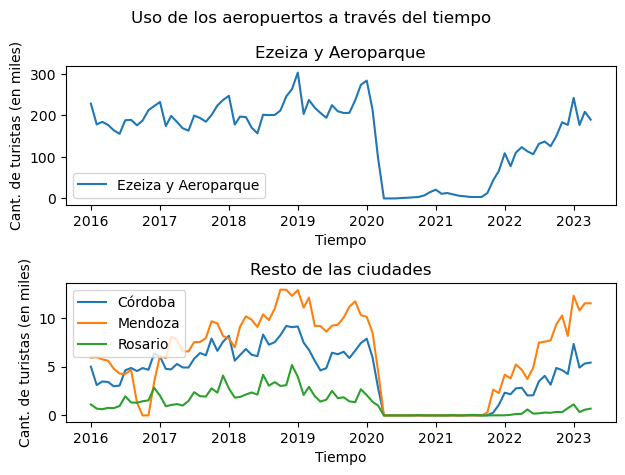

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1)

# Subplot 1: Información de Ezeiza y Aeroparque
axes[0].plot(dffinal['Período'], dffinal['Ezeiza y Aeroparque (1)'], label='Ezeiza y Aeroparque')
axes[0].set_title('Ezeiza y Aeroparque')

# Subplot 2: Resto de las ciudades
axes[1].plot(dffinal['Período'], dffinal['Córdoba'], label='Córdoba')
axes[1].plot(dffinal['Período'], dffinal['Mendoza (2)'], label='Mendoza')
axes[1].plot(dffinal['Período'], dffinal['Rosario'], label='Rosario')
axes[1].set_title('Resto de las ciudades')

axes[0].legend()
axes[1].legend()

fig.suptitle('Uso de los aeropuertos a través del tiempo')
axes[0].set_xlabel('Tiempo')
axes[0].set_ylabel('Cant. de turistas (en miles)')
axes[1].set_xlabel('Tiempo')
axes[1].set_ylabel('Cant. de turistas (en miles)')

fig.tight_layout()

plt.show()


Se puede observar como al fin e inicio de los años hay una subida de los turistas ingresando al pais en estos 4 aeropuertos

<h3>como se distribuyen la cantidad de turistas entre las regiones, me sorpendio la increible diferencia de ezeiza y aeroparque con el resto de los aeropuertos</h3>

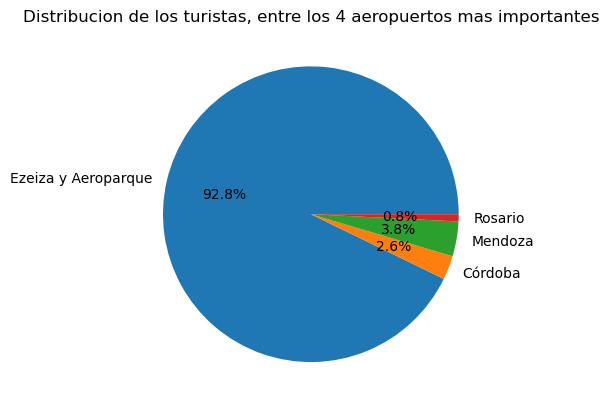

In [26]:
labels = ['Ezeiza y Aeroparque','Córdoba','Mendoza','Rosario']
tamaños = [dffinal['Ezeiza y Aeroparque (1)'].sum(),dffinal['Córdoba'].sum(),dffinal['Mendoza (2)'].sum(),dffinal['Rosario'].sum()]
plt.pie(tamaños, labels=labels, autopct='%1.1f%%')
plt.title('Distribucion de los turistas, entre los 4 aeropuertos mas importantes')
plt.show()

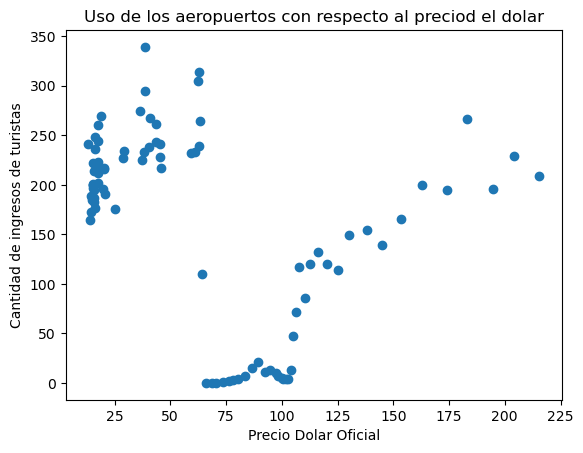

In [27]:
plt.scatter(dffinal['tipo_cambio_bna_vendedor'], dffinal['Total_de_turistas_no_residentes'])
plt.xlabel('Precio Dolar Oficial')
plt.ylabel('Cantidad de ingresos de turistas')
plt.title('Uso de los aeropuertos con respecto al preciod el dolar')
plt.show()

### se puede ver una similaridad en la grafica del precio del dolar con el grafico de los meses(mas abajo), se ve como cuando el dolar estaba a aproximadamente 70, hubo muy pocos turistas, y eso fue en 2020, como en el grafico de los meses, y despues se aprecia una lenta subida de los turistas.

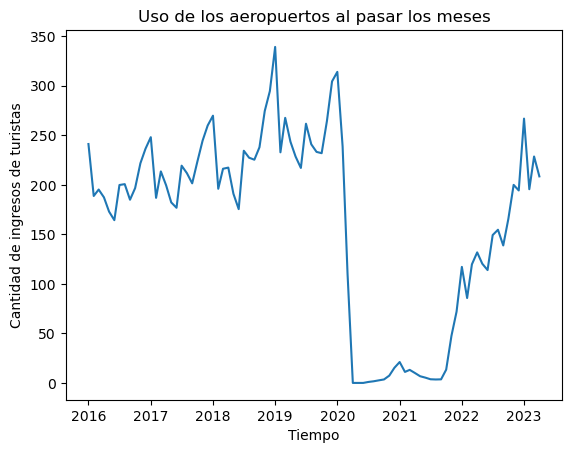

In [28]:
plt.plot(dffinal['Período'],dffinal['Total_de_turistas_no_residentes'])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de ingresos de turistas')
plt.title('Uso de los aeropuertos al pasar los meses')
plt.show()

dado que la cuarentena obligatoria en argentina comenzo en marzo del 2020 decidi tomar esa fecha como metodo de corte.

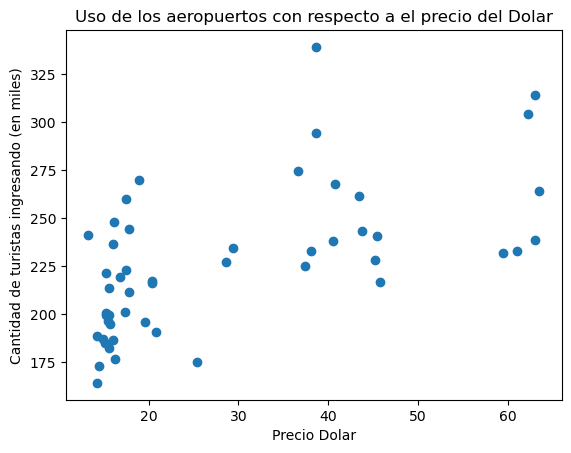

In [29]:
df_antes_pandemia = dffinal[dffinal['Período'] < '2020-03-01']
plt.scatter(df_antes_pandemia['tipo_cambio_bna_vendedor'],df_antes_pandemia['Total_de_turistas_no_residentes'])
plt.xlabel('Precio Dolar')
plt.ylabel('Cantidad de turistas ingresando (en miles)')
plt.title('Uso de los aeropuertos con respecto a el precio del Dolar')
plt.show()

<h3>considerando unicamente los datos antes de la inesperable pandemia, se puede ver una leve creciente en la cantidad de turistas a medida que va aumentando el precio del Dolar me voy a basar en esta seccion para hacer la segunda parte del trabajo practico de regresion linear (2016-2019)</h3>

In [30]:
#cree un dummy en el cual si es temporada alta, es 1, sino es 0
df_antes_pandemia['es_temporada_alta'] = df_antes_pandemia['Período'].apply(lambda x: 1 if x.month in [11, 12, 1] else 0)
df_antes_pandemia

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7468\3621359158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_antes_pandemia['es_temporada_alta'] = df_antes_pandemia['Período'].apply(lambda x: 1 if x.month in [11, 12, 1] else 0)


,Período,Total_de_turistas_no_residentes,Ezeiza y Aeroparque (1),Córdoba,Mendoza (2),Rosario,Salta (3),Resto de aeropuertos,indice_tiempo,tipo_cambio_bna_vendedor,es_temporada_alta
0,2016-01-01,241.177,228.201,4.989,5.91,1.120,0.456,0.501,2016-01-01,13.300,1
1,2016-02-01,188.731,178.110,3.103,5.961,0.695,0.332,0.530,2016-02-01,14.250,0
2,2016-03-01,195.205,184.435,3.471,5.736,0.633,0.328,0.602,2016-03-01,15.700,0
3,2016-04-01,187.329,177.052,3.423,5.598,0.773,0.206,0.277,2016-04-01,14.900,0
4,2016-05-01,172.960,164.081,2.979,4.777,0.742,0.233,0.148,2016-05-01,14.500,0
5,2016-06-01,164.310,155.577,3.056,4.277,0.965,0.285,0.150,2016-06-01,14.200,0
6,2016-07-01,199.814,188.366,4.616,4.234,1.953,0.459,0.186,2016-07-01,15.300,0
7,2016-08-01,200.670,189.189,4.855,4.655,1.330,0.438,0.203,2016-08-01,15.200,0
8,2016-09-01,184.944,176.096,4.537,1.328,1.297,0.286,1.400,2016-09-01,15.100,0
9,2016-10-01,196.668,187.732,4.847,0,1.449,0.434,2.206,2016-10-01,15.500,0


<h3>Creando la regresion linear: </h3>
Cree una regresion linear en el cual la variable dependiente es el "Total_de_turistas_no_residentes" y las independientes son "tipo_cambio_bna_vendedor" y "es_temporada_alta"<br>
Osea:<br>
Total_de_turistas_no_residentes = a + b1*tipo_cambio_bna_vendedor + b2*es_temporada_alta

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#df_antes_pandemia['tipo_cambio_bna_vendedor'] = df_antes_pandemia['tipo_cambio_bna_vendedor'] / df_antes_pandemia['tipo_cambio_bna_vendedor'].abs().max()
#quise normalizar el precio del dolar, y si bien modifico su coeficiente, no vi mejoras en el R cuadrado, asi que lo descarto

mod = smf.ols(formula='Total_de_turistas_no_residentes ~ tipo_cambio_bna_vendedor + es_temporada_alta', data=df_antes_pandemia)
res = mod.fit()
print(res.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Total_de_turistas_no_residentes   R-squared:                       0.746
Model:                                         OLS   Adj. R-squared:                  0.735
Method:                              Least Squares   F-statistic:                     68.94
Date:                             Fri, 07 Jul 2023   Prob (F-statistic):           1.05e-14
Time:                                     17:07:03   Log-Likelihood:                -217.95
No. Observations:                               50   AIC:                             441.9
Df Residuals:                                   47   BIC:                             447.6
Df Model:                                        2                                         
Covariance Type:                         nonrobust                                         
                               coef    std err          t      P>|t|      [0.025

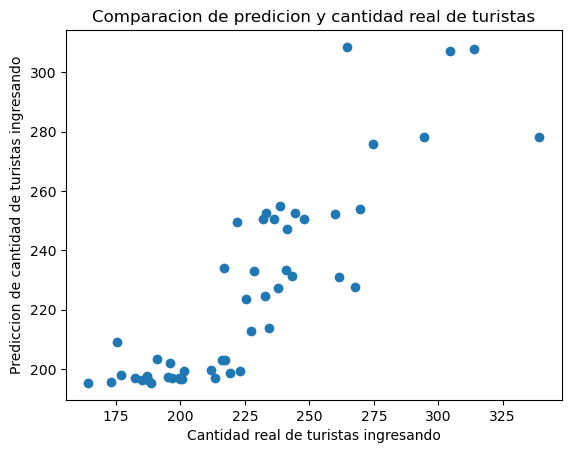

In [34]:
x = df_antes_pandemia['Total_de_turistas_no_residentes']
y =res.predict(df_antes_pandemia[['tipo_cambio_bna_vendedor', 'es_temporada_alta']])
plt.scatter(x,y)
plt.xlabel('Cantidad real de turistas ingresando')
plt.ylabel('Prediccion de cantidad de turistas ingresando')
plt.title('Comparacion de predicion y cantidad real de turistas')
plt.show()

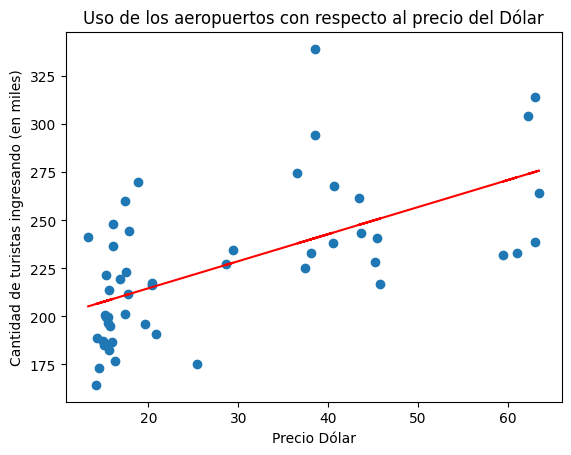

In [23]:
import statsmodels.api as sm

plt.scatter(df_antes_pandemia['tipo_cambio_bna_vendedor'], df_antes_pandemia['Total_de_turistas_no_residentes'])

X = sm.add_constant(df_antes_pandemia['tipo_cambio_bna_vendedor'])
y = df_antes_pandemia['Total_de_turistas_no_residentes']


model = sm.OLS(y, X)
results = model.fit()

intercept, slope = results.params
line = intercept + slope * df_antes_pandemia['tipo_cambio_bna_vendedor']

plt.plot(df_antes_pandemia['tipo_cambio_bna_vendedor'], line, color='red')

plt.xlabel('Precio Dólar')
plt.ylabel('Cantidad de turistas ingresando (en miles)')
plt.title('Uso de los aeropuertos con respecto al precio del Dólar')

plt.show()

<h3> Conclusiones: </h3><br>

Interpretando la regresion linear hecha con OLS se puede extraer que:<br>
Total_de_turistas_no_residentes = 178.0136 + 1.2216*tipo_cambio_bna_vendedor + 52.9839*es_temporada_alta.<br>
Puede verse que se ajustan bastante bien a los datos, ya que el R cuadrado dio 0.746, osea que aproximadamente el 74.6% de la variabilidad de la variable dependiente puede ser explicada por el modelo de regresión lineal utilizado.<br>
Tambien es importante aclarar que los valores p dieron muy bajos lo cual nos sirve para poder afirmar que la probabilidad de que los coeficientes de las variables independientes sea 0 es muy pequeña, y eso permite que sean variables con valor.<br>
Si bien tenemos un tamaño de muestra que no es chico (n = 50), me hubiera gustado conseguir algunos datos en el cual tenga una muestra con mas datos.